<a href="https://colab.research.google.com/github/Shreeshambav/DeepLearning_training/blob/main/EDA_Featureengineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Budget_merged_file_Cat_working.xlsx to Budget_merged_file_Cat_working (1).xlsx


In [ ]:
### Step3: Feature engineering the data
import pandas as pd
# Read input files
file_path_merged = 'Budget_merged_file_Cat_working.xlsx'
df_merged_group_cat = pd.read_excel(file_path_merged)
# file_path_merged = 'C:\\Users\\mraj4\\Documents\\OptimumPython\\DS\\DL\\Sunoida\\Budget_merged_file_Cat_working.xlsx'
# df_merged_group_cat = pd.read_excel(file_path_merged)

# Problem statement: What should be the budget alloocated for next financial year.
# For further analysis we need to divide daatset into independent and dependent features
# MRL_Category is dependent column and rest are independent
# Following column do not add any value to analysis:
# Selection of Columns: LE_BOOK(2), OFFICE_ACCOUNT(3), VISION_SBU(5), ACCOUNT_OFFICER(6), PRODUCT(9)
print(df_merged_group_cat)

# Assuming df_merged_group_cat is the DataFrame containing the data
columns_to_drop = ['LE_BOOK', 'OFFICE_ACCOUNT', 'VISION_SBU', 'ACCOUNT_OFFICER', 'PRODUCT']
df_merged_group_cat = df_merged_group_cat.drop(columns=columns_to_drop)
df_merged_group_cat.shape

# Preparing Category for encodeing
category_mapping = {
    1: 'Cat1',
    2: 'Cat2',
    3: 'Cat3',
    4: 'Cat4'
}

df_merged_group_cat['MRL_Category'] = df_merged_group_cat['MRL_Category'].replace(category_mapping)

# Assuming df_merged_group_cat is the DataFrame containing the data
# One-hot encode the "MRL_Category" column
encoded_categories = pd.get_dummies(df_merged_group_cat["MRL_Category"], prefix="MRL_Category")

# Drop the original "MRL_Category" column
df_merged_group_cat.drop(columns=["MRL_Category"], inplace=True)

# Concatenate the encoded columns with the original DataFrame
df_merged_group_cat = pd.concat([df_merged_group_cat, encoded_categories], axis=1)
print(df_merged_group_cat)
df_merged_group_cat.isnull().sum()

      COUNTRY  LE_BOOK  OFFICE_ACCOUNT  VISION_OUC VISION_SBU ACCOUNT_OFFICER  \
0          KE        1  10010173017002  KE01000001       BL07             NaN   
1          KE        1  10010173011001  KE01000001       BL07             NaN   
2          KE        1  10010170004001  KE01000001        NaN             NaN   
3          KE        1  19990170007008  KE01000001        NaN             NaN   
4          KE        1  10010170501001  KE01000001        NaN             NaN   
...       ...      ...             ...         ...        ...             ...   
29002      KE        1  19990173023001  KE01008138        NaN             NaN   
29003      KE        1  19990175001001  KE01008110       BL07             NaN   
29004      KE        1  19990175001001  KE0100PC07       BL07             NaN   
29005      KE        1  19990175001001  KE01008010        NaN             NaN   
29006      KE        1  19990175001001  KE01008110        NaN             NaN   

      CURRENCY MRL_LINE   P

COUNTRY              0
VISION_OUC           0
CURRENCY             0
MRL_LINE             0
01                   0
02                   0
03                   0
04                   0
05                   0
06                   0
07                   0
08                   0
09                   0
10                   0
11                   0
12                   0
Year                 0
MRL_Category_Cat1    0
MRL_Category_Cat2    0
MRL_Category_Cat3    0
MRL_Category_Cat4    0
dtype: int64

In [ ]:
### Testing Gausian behaviour of data - Monthwise
##########
import pandas as pd
import scipy.stats as stats

# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
selected_data = df_merged_group_cat[selected_columns]

# Step 2: Iterate over unique months (01 to 12) for the tests
unique_months = selected_data.columns

for month in unique_months:
    month_data = selected_data[month]

    # Shapiro-Wilk test
    shapiro_stat, shapiro_p_value = stats.shapiro(month_data)
    print(f"Shapiro-Wilk Test for Month {month}: Statistic={shapiro_stat}, p-value={shapiro_p_value}")

    # Anderson-Darling test
    anderson_stat, anderson_critical_values, anderson_significance = stats.anderson(month_data, dist='norm')
    print(f"Anderson-Darling Test for Month {month}: Statistic={anderson_stat}")
    for i in range(len(anderson_critical_values)):
        sl, cv = anderson_significance[i], anderson_critical_values[i]
        if anderson_stat < cv:
            print(f"Data follows a normal distribution at the {sl*100}% level of significance")
        else:
            print(f"Data does not follow a normal distribution at the {sl*100}% level of significance")

    print("\n")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for Month 01: Statistic=0.035471320152282715, p-value=0.0
Anderson-Darling Test for Month 01: Statistic=10321.062159889269
Data does not follow a normal distribution at the 1500.0% level of significance
Data does not follow a normal distribution at the 1000.0% level of significance
Data does not follow a normal distribution at the 500.0% level of significance
Data does not follow a normal distribution at the 250.0% level of significance
Data does not follow a normal distribution at the 100.0% level of significance


Shapiro-Wilk Test for Month 02: Statistic=0.03527349233627319, p-value=0.0
Anderson-Darling Test for Month 02: Statistic=10271.500793408697
Data does not follow a normal distribution at the 1500.0% level of significance
Data does not follow a normal distribution at the 1000.0% level of significance
Data does not follow a normal distribution at the 500.0% level of significance
Data does not follow a normal distribution at the 250.0% level of significance
Da

In [ ]:
# Testing Quarter-wise
import pandas as pd
import scipy.stats as stats

# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "Year"]
selected_data = df_merged_group_cat[selected_columns]

# Step 2: Group data by 'Year'
selected_data['Year'] = selected_data['Year'].astype(str)
grouped_data = selected_data.groupby('Year')

# Step 3: Iterate over unique months for the tests
unique_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

for month in unique_months:
    for year, year_data in grouped_data:
        year_data = year_data.drop(['Year'], axis=1)
        month_data = year_data[month]

        # Check Quarter based on the month value
        quarter = ''
        if month in ['01', '02', '03']:
            quarter = 'Q1'
        elif month in ['04', '05', '06']:
            quarter = 'Q2'
        elif month in ['07', '08', '09']:
            quarter = 'Q3'
        else:
            quarter = 'Q4'

        # Shapiro-Wilk test
        shapiro_stat, shapiro_p_value = stats.shapiro(month_data)
        print(f"Shapiro-Wilk Test for Month {month} in Quarter {quarter} of Year {year}: Statistic={shapiro_stat}, p-value={shapiro_p_value}")

        # Anderson-Darling test
        anderson_stat, anderson_critical_values, anderson_significance = stats.anderson(month_data, dist='norm')
        print(f"Anderson-Darling Test for Month {month} in Quarter {quarter} of Year {year}: Statistic={anderson_stat}")
        for i in range(len(anderson_critical_values)):
            sl, cv = anderson_significance[i], anderson_critical_values[i]
            if anderson_stat < cv:
                print(f"Data follows a normal distribution at the {sl*100}% level of significance")
            else:
                print(f"Data does not follow a normal distribution at the {sl*100}% level of significance")

        print("\n")






<ipython-input-4-d6f68d2a6a3e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Year'] = selected_data['Year'].astype(str)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1948: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s
/usr/local/lib/python3.10/dist-packages/scipy/stats/

Shapiro-Wilk Test for Month 01 in Quarter Q1 of Year 2019: Statistic=1.0, p-value=1.0
Anderson-Darling Test for Month 01 in Quarter Q1 of Year 2019: Statistic=nan
Data does not follow a normal distribution at the 1500.0% level of significance
Data does not follow a normal distribution at the 1000.0% level of significance
Data does not follow a normal distribution at the 500.0% level of significance
Data does not follow a normal distribution at the 250.0% level of significance
Data does not follow a normal distribution at the 100.0% level of significance


Shapiro-Wilk Test for Month 01 in Quarter Q1 of Year 2020: Statistic=0.0453377366065979, p-value=0.0
Anderson-Darling Test for Month 01 in Quarter Q1 of Year 2020: Statistic=3267.5720651078846
Data does not follow a normal distribution at the 1500.0% level of significance
Data does not follow a normal distribution at the 1000.0% level of significance
Data does not follow a normal distribution at the 500.0% level of significance
Data d

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_moresta

Anderson-Darling Test for Month 05 in Quarter Q2 of Year 2021: Statistic=3577.875088353783
Data does not follow a normal distribution at the 1500.0% level of significance
Data does not follow a normal distribution at the 1000.0% level of significance
Data does not follow a normal distribution at the 500.0% level of significance
Data does not follow a normal distribution at the 250.0% level of significance
Data does not follow a normal distribution at the 100.0% level of significance


Shapiro-Wilk Test for Month 06 in Quarter Q2 of Year 2019: Statistic=0.014264523983001709, p-value=0.0
Anderson-Darling Test for Month 06 in Quarter Q2 of Year 2019: Statistic=3398.768950606791
Data does not follow a normal distribution at the 1500.0% level of significance
Data does not follow a normal distribution at the 1000.0% level of significance
Data does not follow a normal distribution at the 500.0% level of significance
Data does not follow a normal distribution at the 250.0% level of significanc

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_moresta

In [ ]:
# Code to test Quarte-wise across the year
import pandas as pd
import scipy.stats as stats

# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "Year"]
selected_data = df_merged_group_cat[selected_columns]

# Step 2: Group data by 'Year'
selected_data['Year'] = selected_data['Year'].astype(str)
grouped_data = selected_data.groupby('Year')

# Step 3: Iterate over unique months for the tests
unique_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create an empty list to store the test results
test_results = []

for month in unique_months:
    for year, year_data in grouped_data:
        year_data = year_data.drop(['Year'], axis=1)
        month_data = year_data[month]

        # Check Quarter based on the month value
        quarter = ''
        if month in ['01', '02', '03']:
            quarter = 'Q1'
        elif month in ['04', '05', '06']:
            quarter = 'Q2'
        elif month in ['07', '08', '09']:
            quarter = 'Q3'
        else:
            quarter = 'Q4'

        # Shapiro-Wilk test
        shapiro_stat, shapiro_p_value = stats.shapiro(month_data)

        # Anderson-Darling test
        anderson_stat, _, anderson_critical_values = stats.anderson(month_data, dist='norm')
        significance_level = [0.15, 0.10, 0.05, 0.025, 0.01]
        distribution = ''
        for sl, cv in zip(significance_level, anderson_critical_values):
            if anderson_stat < cv:
                distribution = f"Normal (at {sl*100}% level)"
                break
            else:
                distribution = "Not Normal"

        # Append the results to the list
        test_results.append({
            'Month': month,
            'Quarter': quarter,
            'Year': year,
            'Shapiro-Stat': shapiro_stat,
            'Shapiro-p-value': shapiro_p_value,
            'Anderson-Stat': anderson_stat,
            'Distribution': distribution
        })

# Create a DataFrame from the list of test results
test_results_df = pd.DataFrame(test_results)

# Display the test results
print(test_results_df)



<ipython-input-6-840de40fb61c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Year'] = selected_data['Year'].astype(str)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1948: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s
/usr/local/lib/python3.10/dist-packages/scipy/stats/

   Month Quarter  Year  Shapiro-Stat  Shapiro-p-value  Anderson-Stat  \
0     01      Q1  2019      1.000000              1.0            NaN   
1     01      Q1  2020      0.045338              0.0    3267.572065   
2     01      Q1  2021      0.053302              0.0    3529.357832   
3     02      Q1  2019      1.000000              1.0            NaN   
4     02      Q1  2020      0.044100              0.0    3281.238906   
5     02      Q1  2021      0.116569              0.0    3324.740138   
6     03      Q1  2019      1.000000              1.0            NaN   
7     03      Q1  2020      0.076137              0.0    3133.471571   
8     03      Q1  2021      0.025893              0.0    3645.064835   
9     04      Q2  2019      1.000000              1.0            NaN   
10    04      Q2  2020      0.035037              0.0    3295.309128   
11    04      Q2  2021      0.026655              0.0    3626.791213   
12    05      Q2  2019      0.016459              0.0    3427.00

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_moresta

In [ ]:
##################
#### IQR Upperbound Lower Bound Extreme lower bound and Extreme upper bound
##################
# Assumption data in months column follows a Gausian distribution we will calculate the boundaries which differentiate the outliers
# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

import pandas as pd

# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis (Months: 01 to 12)
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
selected_data = df_merged_group_cat[selected_columns]

# Step 2: Create an empty DataFrame to store the results
output_df = pd.DataFrame(columns=["Month", "Upper_Bound_Gaussian", "Lower_Bound_Gaussian", "Mean", "IQR", "Lower_Bridge", "Upper_Bridge", "Extreme_Lower_Bridge", "Extreme_Upper_Bridge"])

# Step 3: Calculate the bounds and statistics for each month and store in the output DataFrame
for month in selected_data.columns:
    # Calculate bounds using Gaussian distribution assumption
    upper_bound_month = selected_data[month].mean() + 3 * selected_data[month].std()
    lower_bound_month = selected_data[month].mean() - 3 * selected_data[month].std()

    # Calculate IQR and outliers within range
    IQR_month = selected_data[month].quantile(0.75) - selected_data[month].quantile(0.25)
    lower_bridge_month = selected_data[month].quantile(0.25) - (IQR_month * 1.5)
    upper_bridge_month = selected_data[month].quantile(0.75) + (IQR_month * 1.5)

    # Calculate extreme outliers
    extreme_lower_bridge_month = selected_data[month].quantile(0.25) - (IQR_month * 3)
    extreme_upper_bridge_month = selected_data[month].quantile(0.75) + (IQR_month * 3)

    # Append the results to the output DataFrame
    output_df = output_df.append({"Month": month,
                                  "Upper_Bound_Gaussian": upper_bound_month,
                                  "Lower_Bound_Gaussian": lower_bound_month,
                                  "Mean": selected_data[month].mean(),
                                  "IQR": IQR_month,
                                  "Lower_Bridge": lower_bridge_month,
                                  "Upper_Bridge": upper_bridge_month,
                                  "Extreme_Lower_Bridge": extreme_lower_bridge_month,
                                  "Extreme_Upper_Bridge": extreme_upper_bridge_month},
                                  ignore_index=True)

# Step 4: Write the output DataFrame to an Excel file
output_file_path = "C:\\Users\\mraj4\\Documents\\OptimumPython\\DS\\DL\\Sunoida\\Budget_merged_file_Cat_working_outliers.xlsx"
output_df.to_excel(output_file_path, index=False)

<ipython-input-11-4cc8d78ade32>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Month": month,
<ipython-input-11-4cc8d78ade32>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Month": month,
<ipython-input-11-4cc8d78ade32>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Month": month,
<ipython-input-11-4cc8d78ade32>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Month": month,
<ipython-input-11-4cc8d78ade32>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [ ]:
######
### Now we will replace outliers with upper and lower bound data
######

import pandas as pd

# Read the data from the Excel file
outliers_data = pd.read_excel("C:\\Users\\mraj4\\Documents\\OptimumPython\\DS\\DL\\Sunoida\\Budget_merged_file_Cat_working_outliers.xlsx")

# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

# Define a function to replace outliers for each month
def replace_outliers(row, month):
    if month in outliers_data['Month'].values:
        upper_bound = outliers_data.loc[outliers_data['Month'] == month, 'Upper_Bound_Gaussian'].values[0]
        lower_bound = outliers_data.loc[outliers_data['Month'] == month, 'Lower_Bound_Gaussian'].values[0]

        if row > upper_bound:
            return upper_bound
        elif row < lower_bound:
            return lower_bound
    return row

# Replace outliers for each month (January to December)
for month in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
    df_merged_group_cat[month] = df_merged_group_cat[month].apply(replace_outliers, args=(month,))

# Print the updated DataFrame
print(df_merged_group_cat)

<Figure size 1200x800 with 0 Axes>

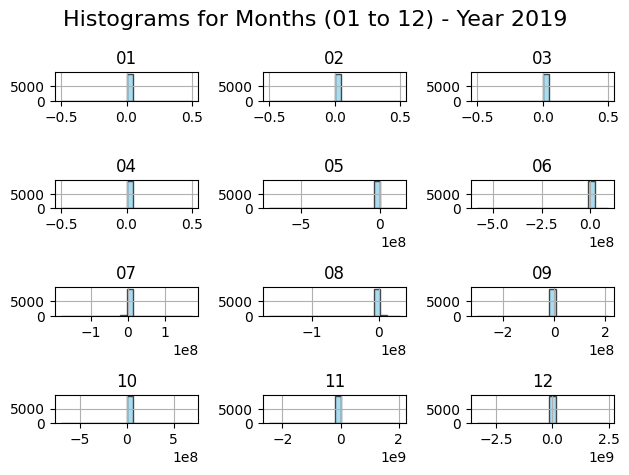

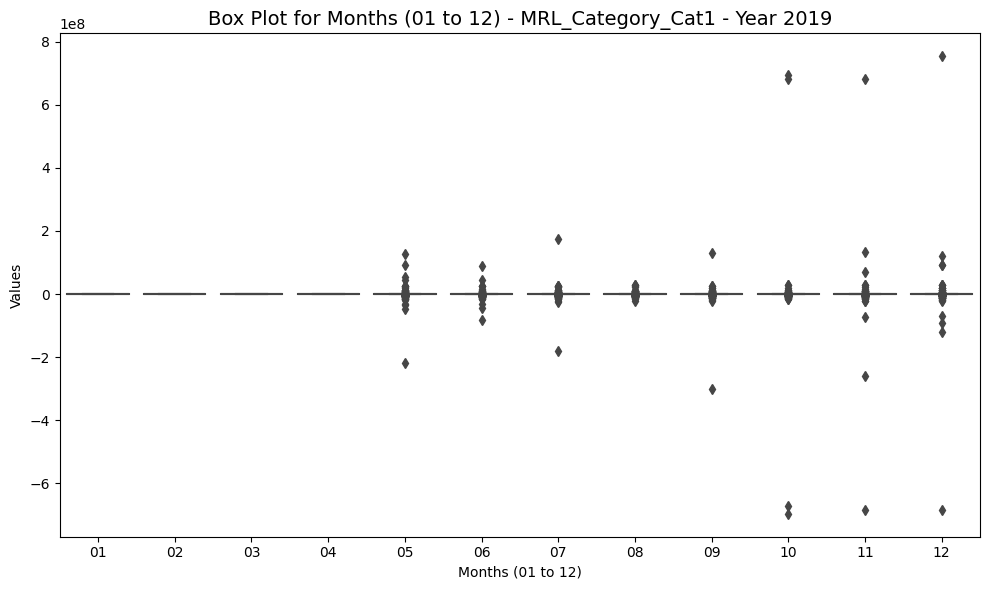

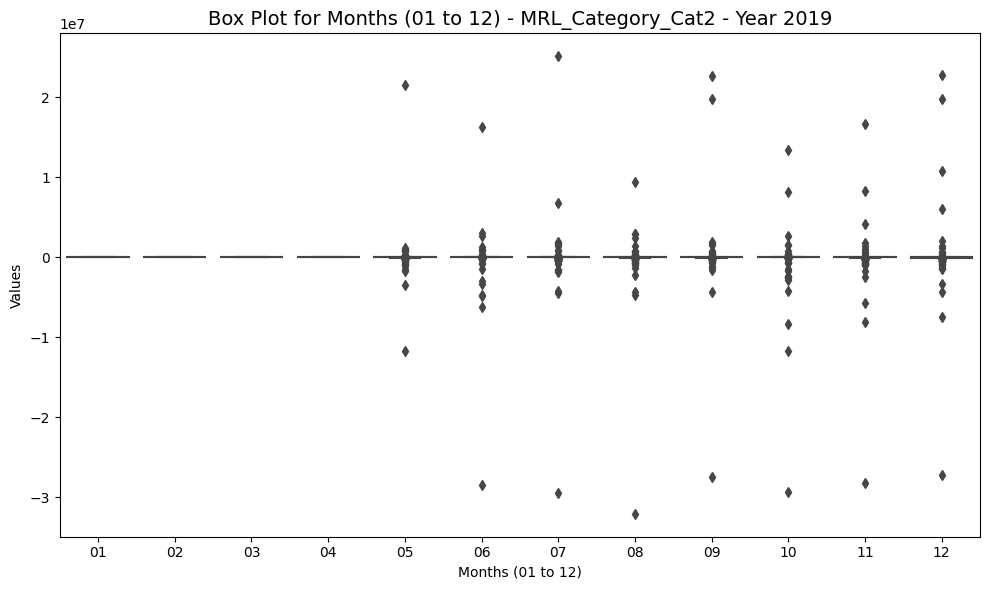

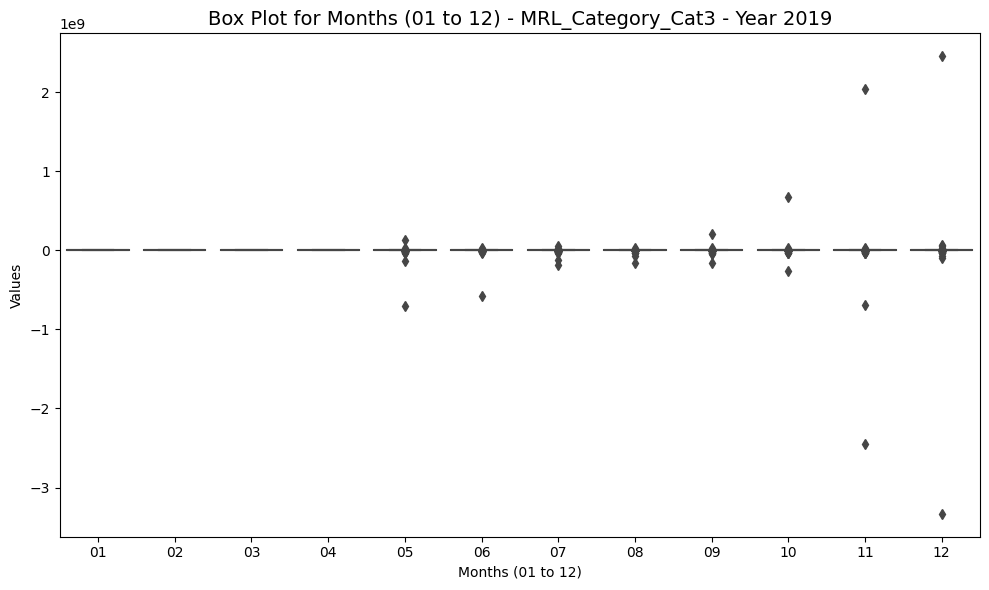

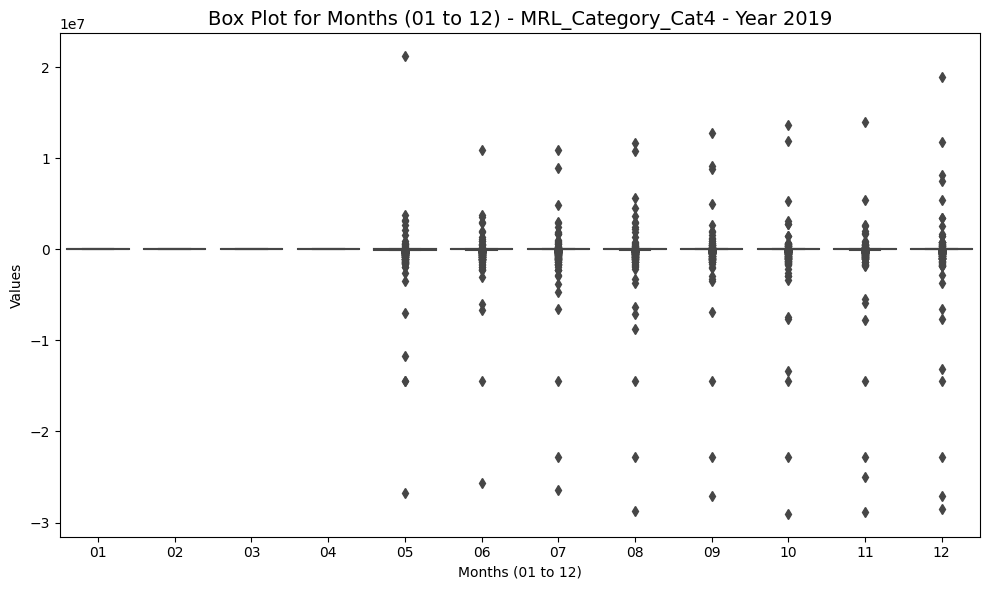

<Figure size 1200x800 with 0 Axes>

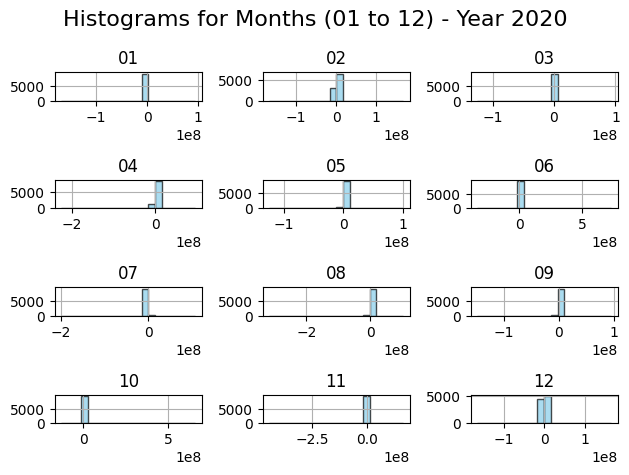

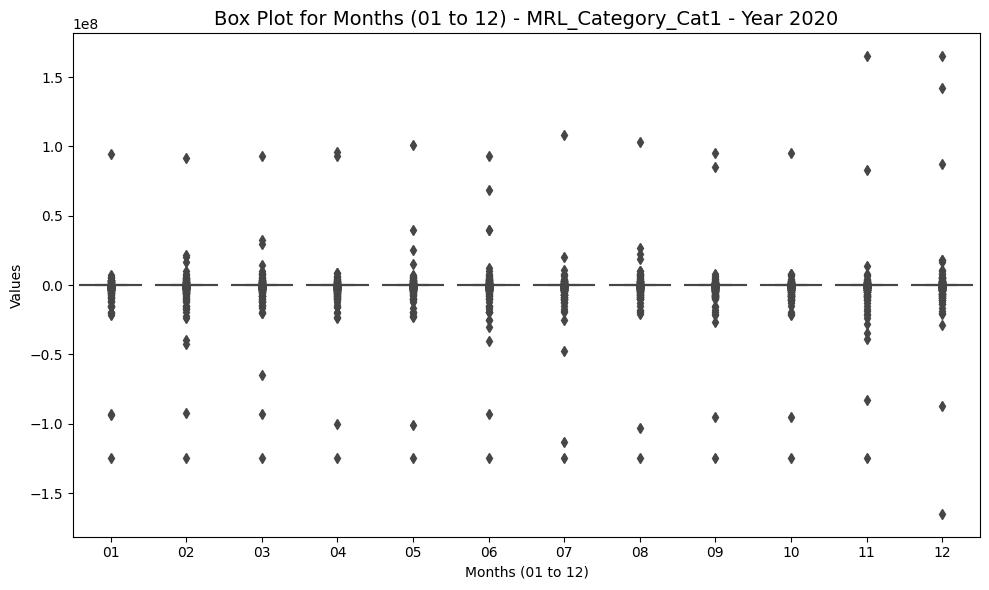

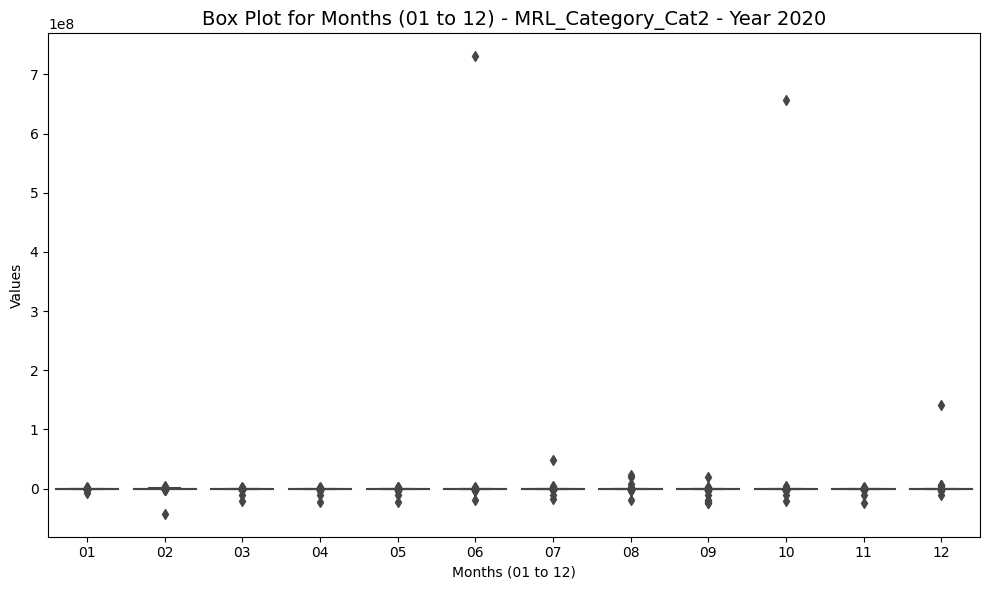

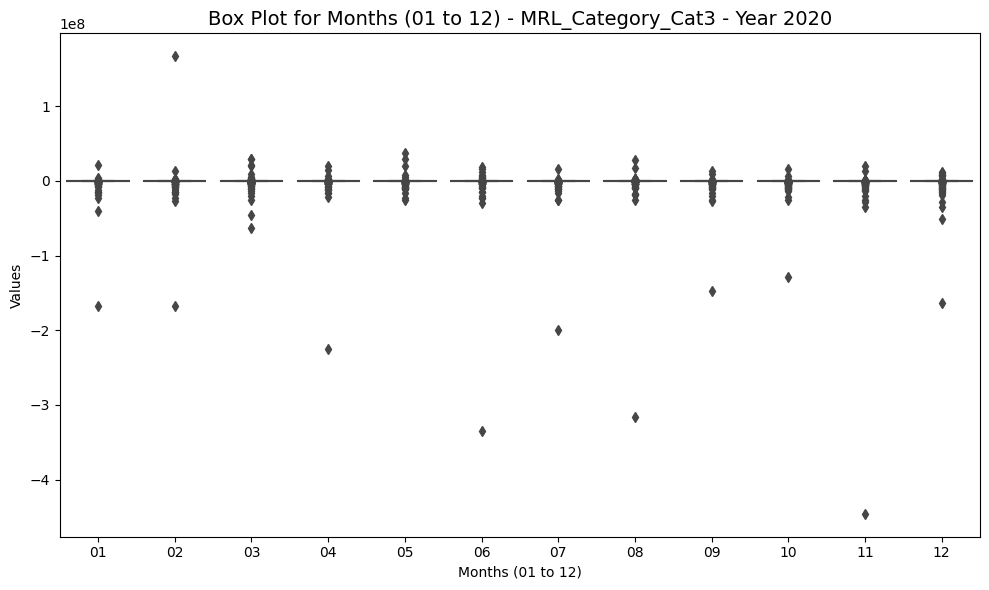

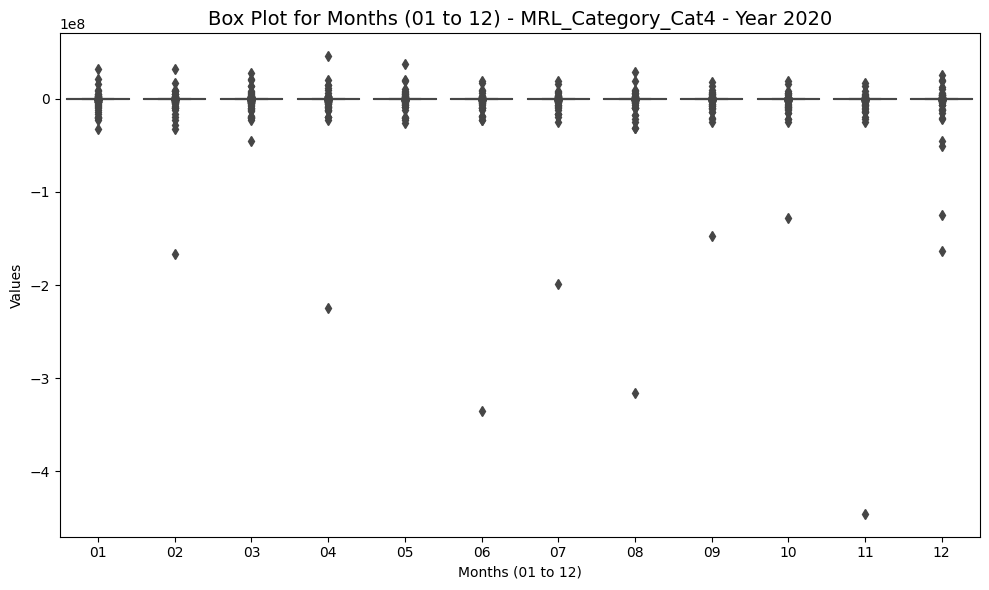

<Figure size 1200x800 with 0 Axes>

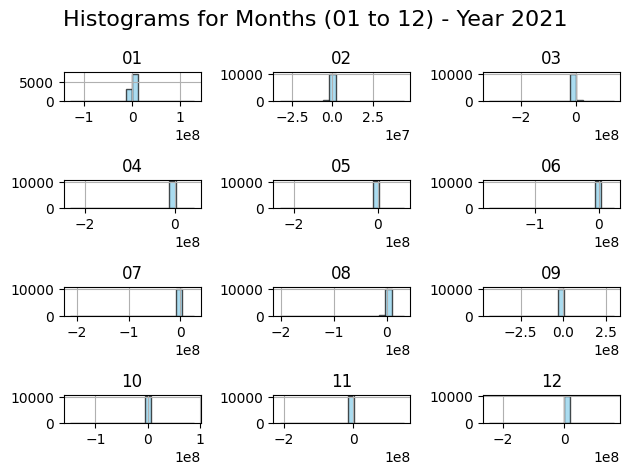

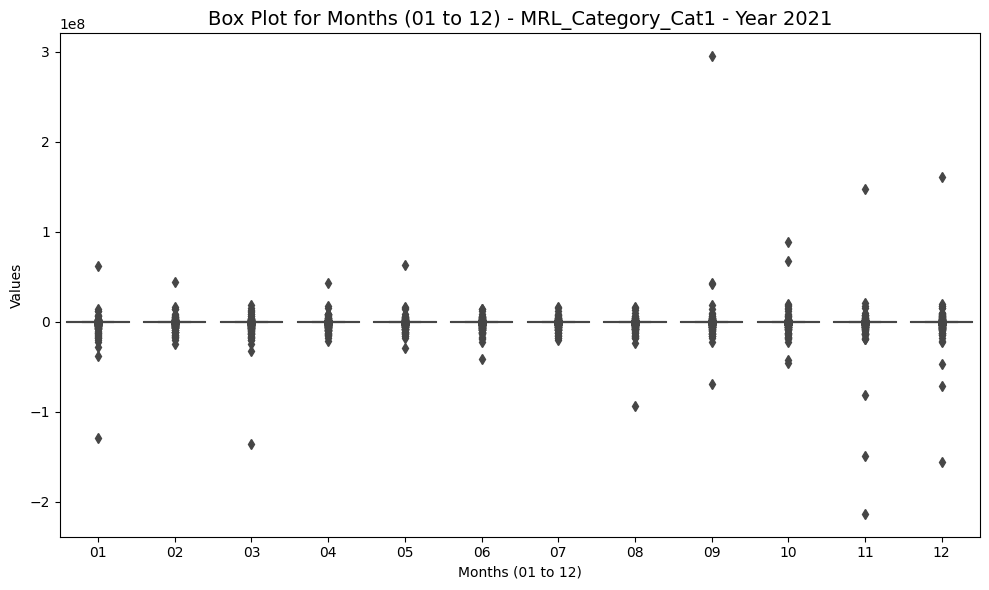

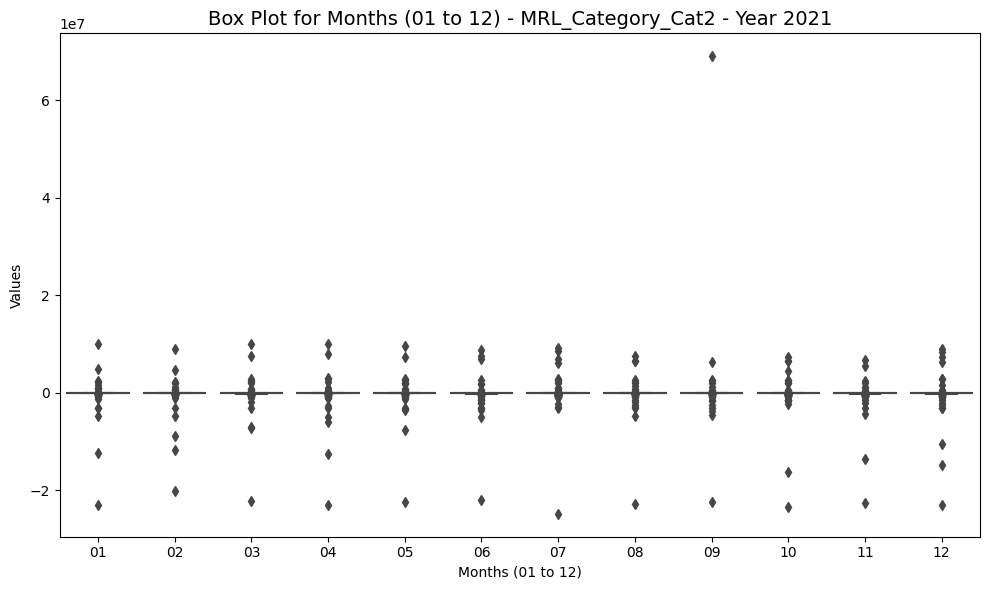

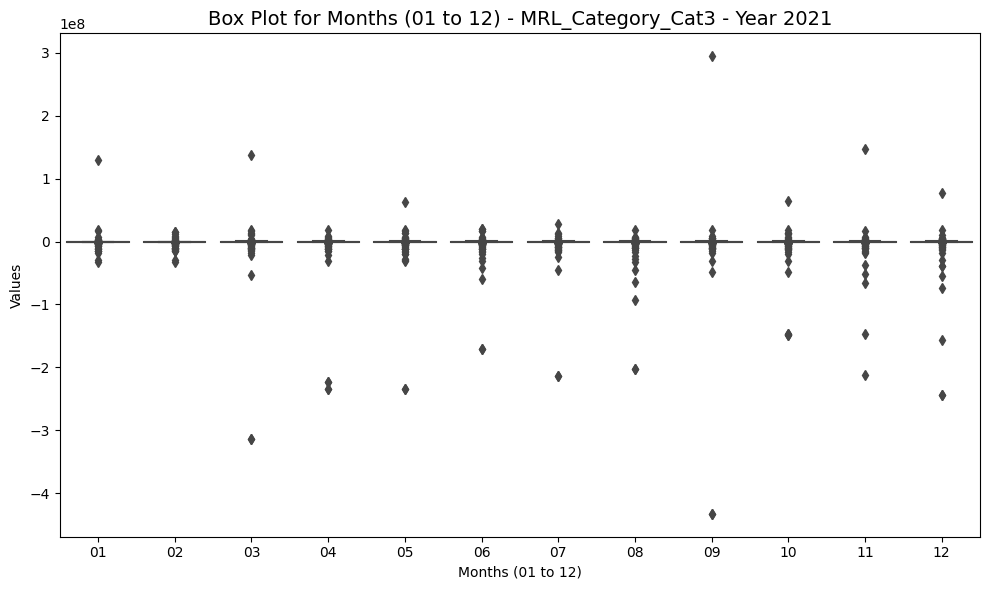

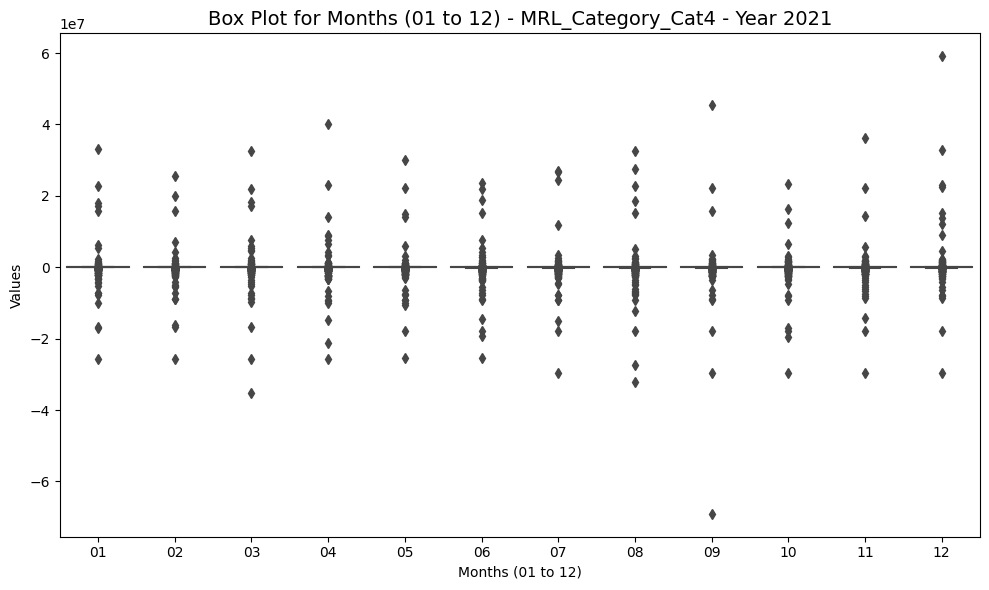

In [ ]:
# Plots for the data - Histogram and Box plots for all the month based on category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming we have the dataset in a DataFrame named 'df_merged_group_cat'
# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4", "Year"]
selected_data = df_merged_group_cat[selected_columns]

# Step 2: Iterate over unique years in the DataFrame
unique_years = selected_data['Year'].unique()

for year in unique_years:
    # Filter data for the current year
    year_data = selected_data[selected_data['Year'] == year]

    # Step 3: Create histograms for the columns "01" to "12" for the current year
    plt.figure(figsize=(12, 8))
    year_data.iloc[:, :12].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.suptitle(f"Histograms for Months (01 to 12) - Year {year}", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Step 4: Create separate box plots for each "MRL_Category_CatX" for the current year
    mrl_categories = ["MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4"]

    for category in mrl_categories:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="variable", y="value", data=pd.melt(year_data[year_data[category] == 1].iloc[:, :12]))
        plt.title(f"Box Plot for Months (01 to 12) - {category} - Year {year}", fontsize=14)
        plt.xlabel("Months (01 to 12)")
        plt.ylabel("Values")
        plt.tight_layout()
        plt.show()


<Figure size 1200x800 with 0 Axes>

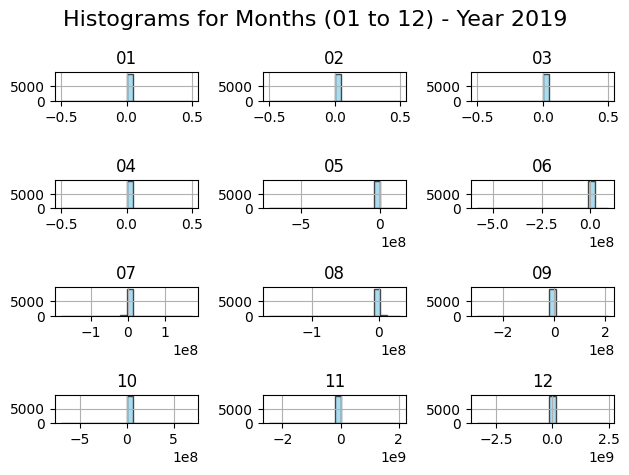

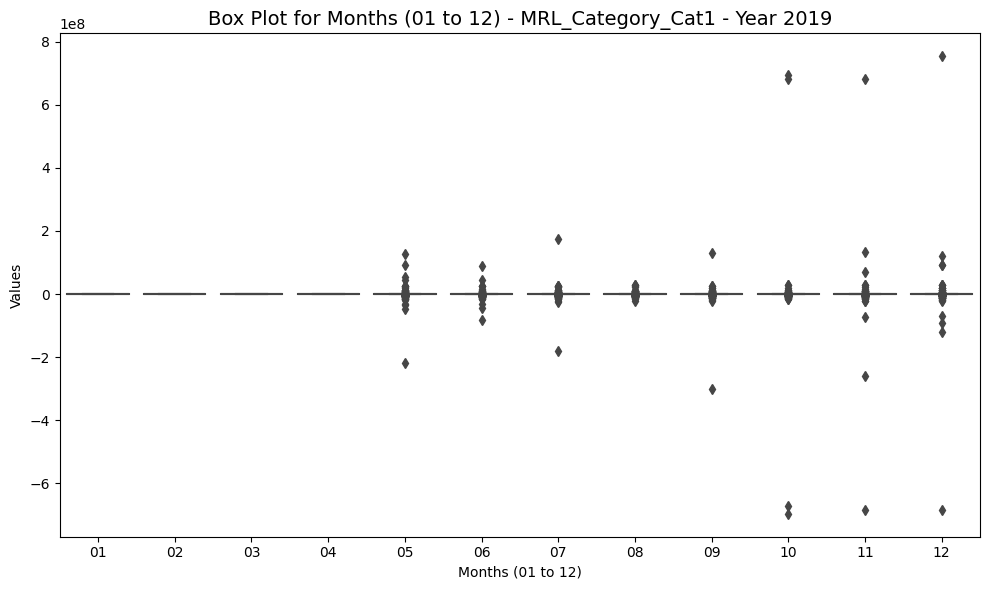

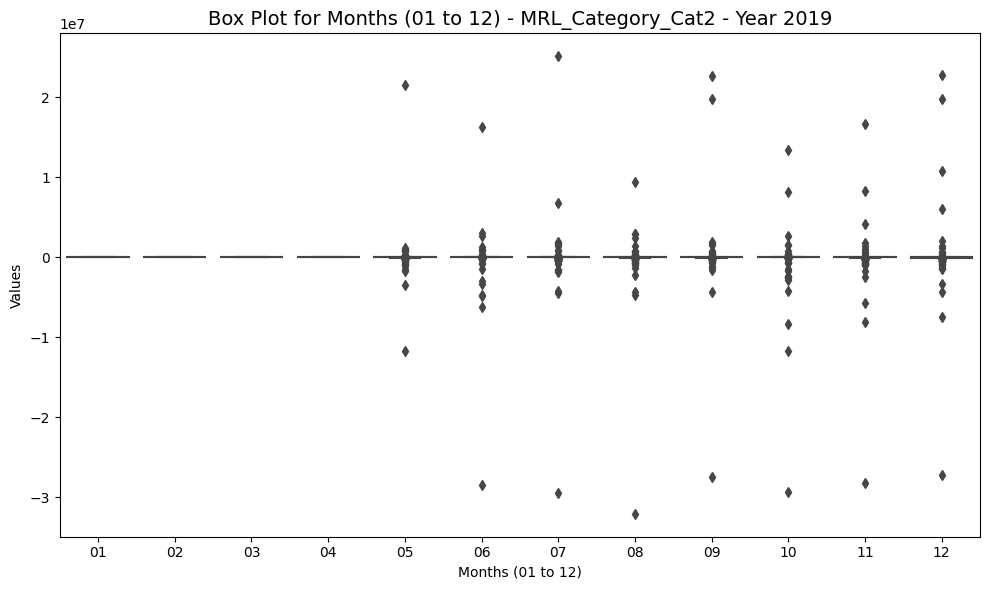

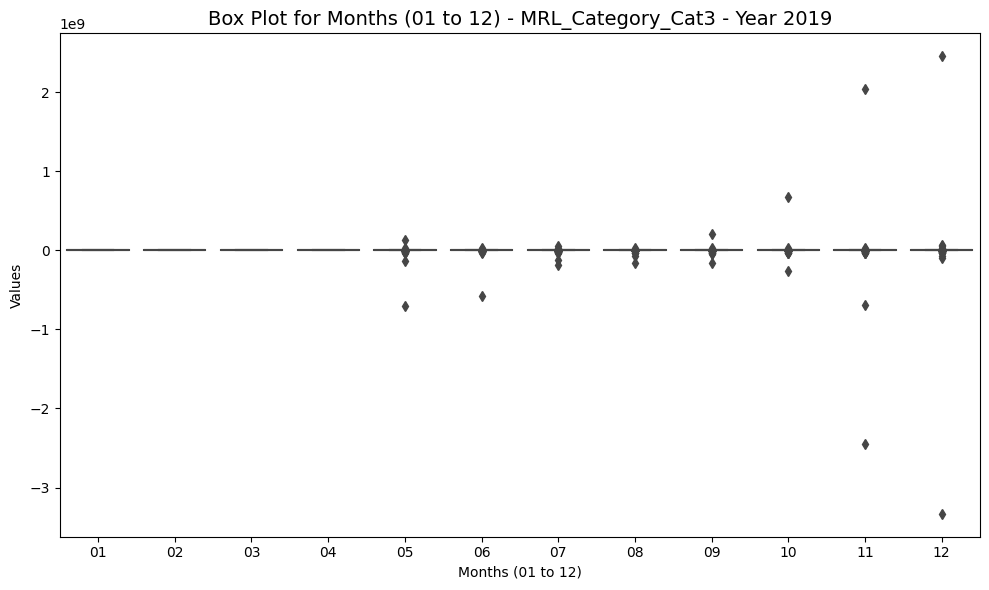

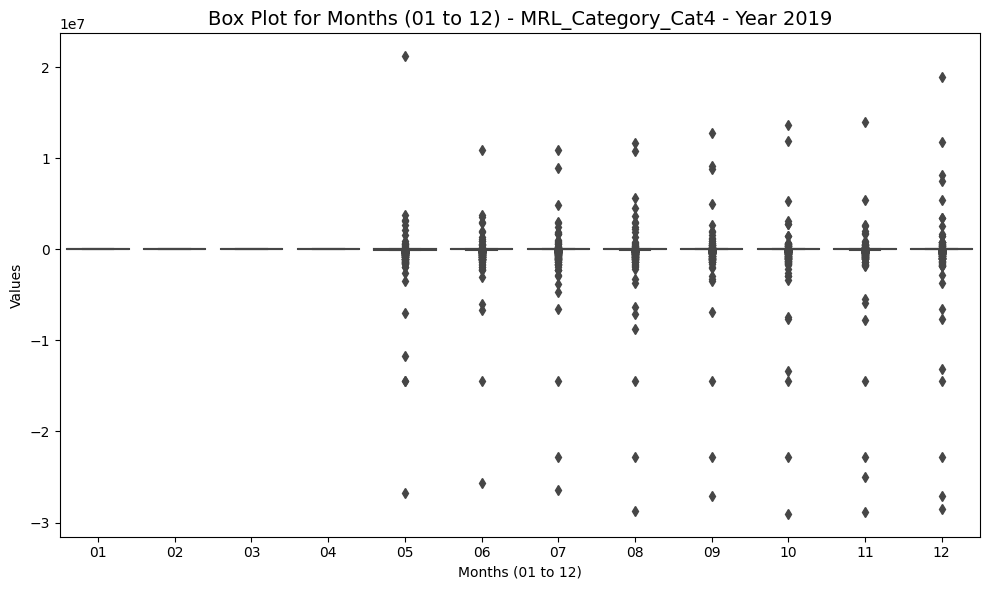

<Figure size 1200x800 with 0 Axes>

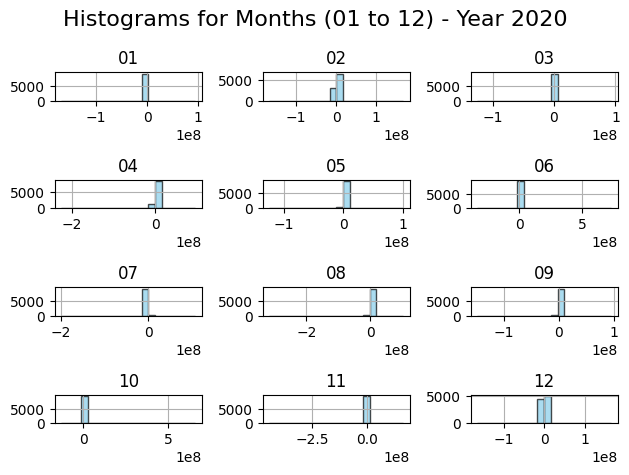

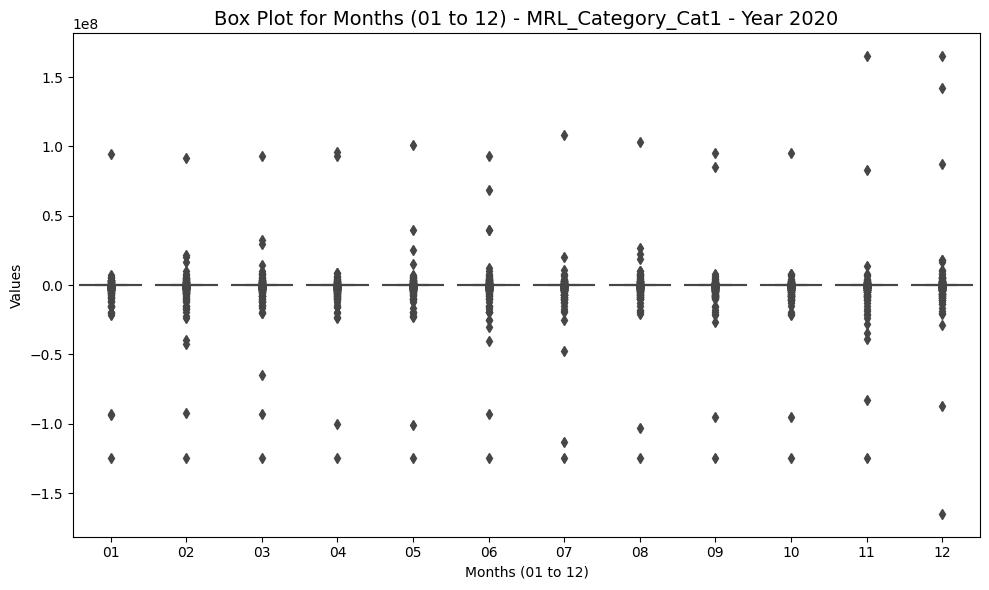

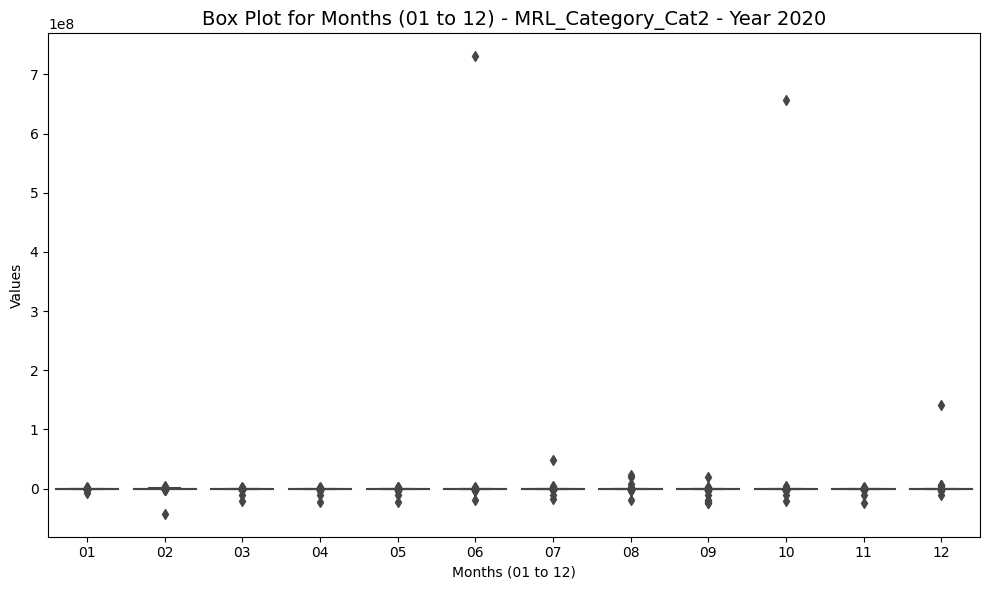

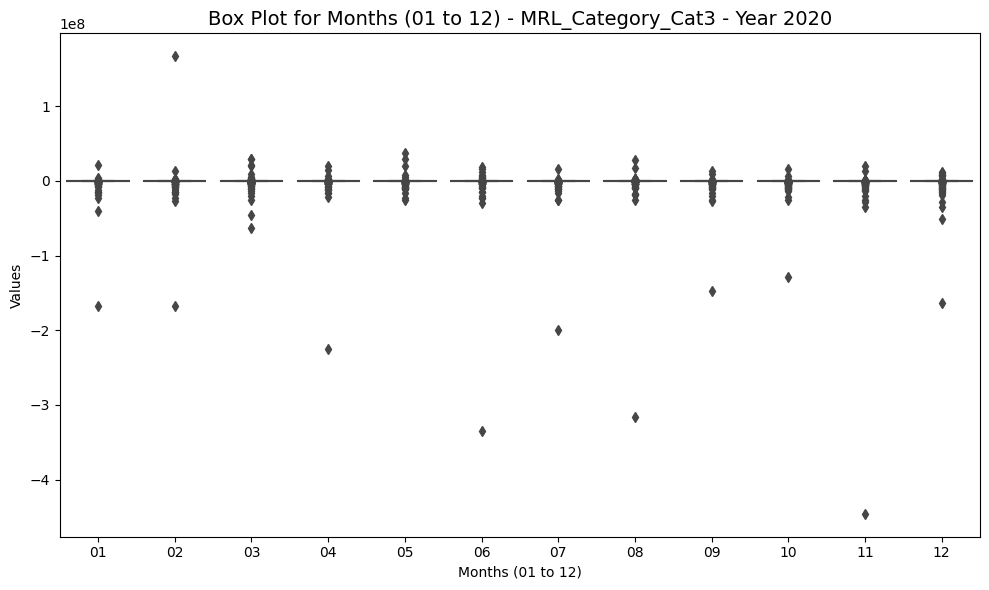

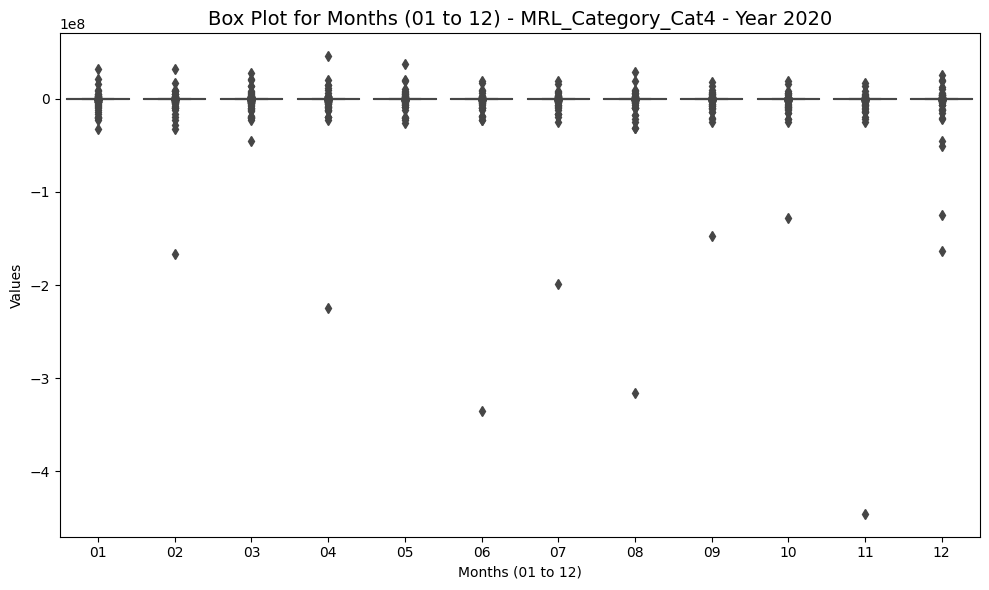

<Figure size 1200x800 with 0 Axes>

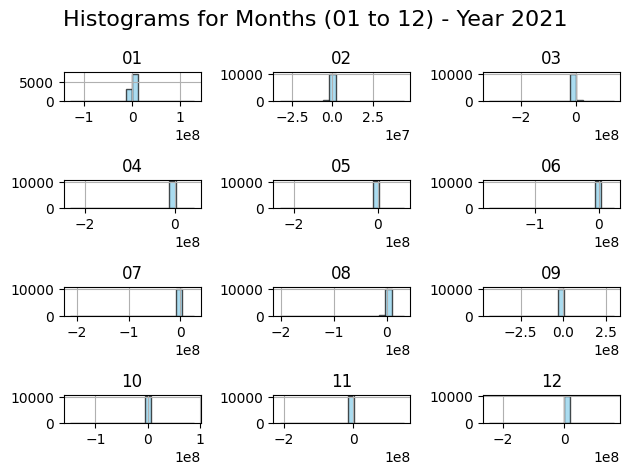

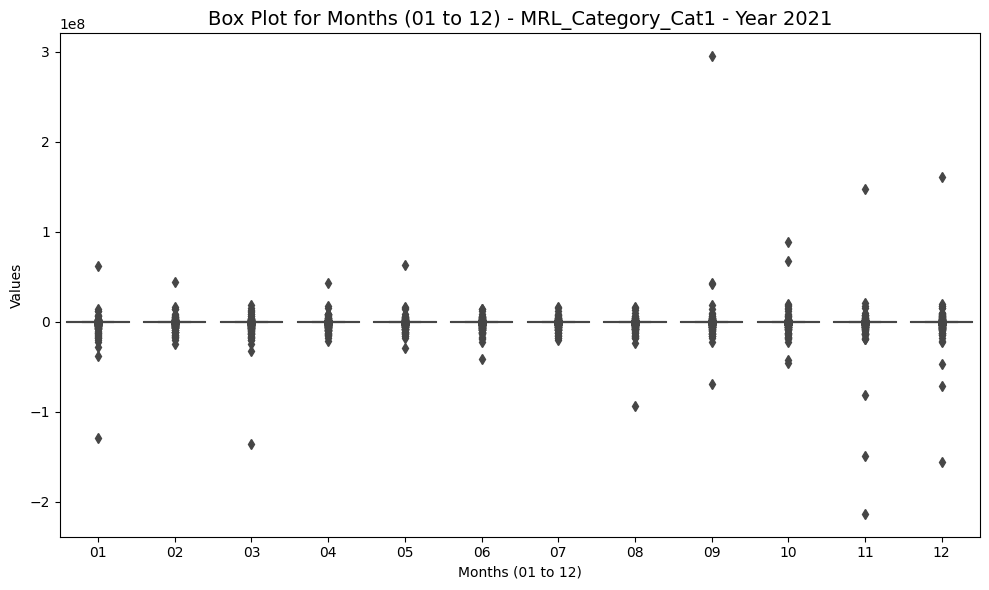

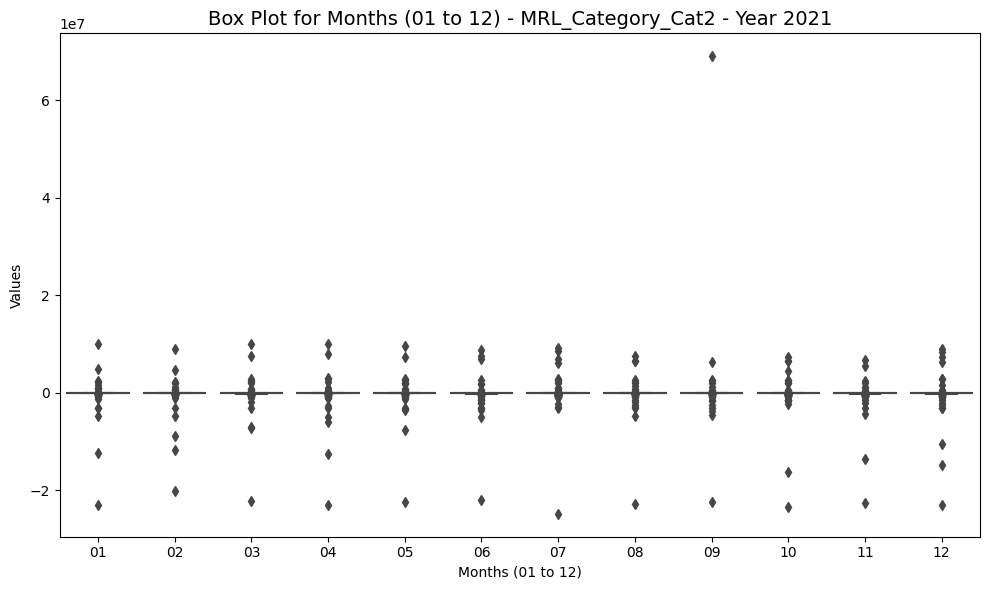

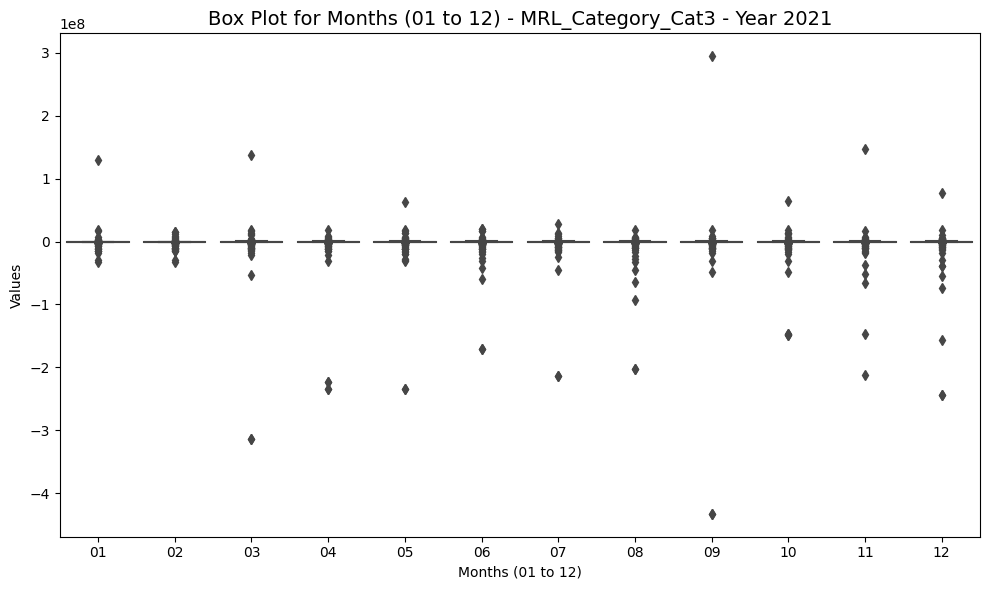

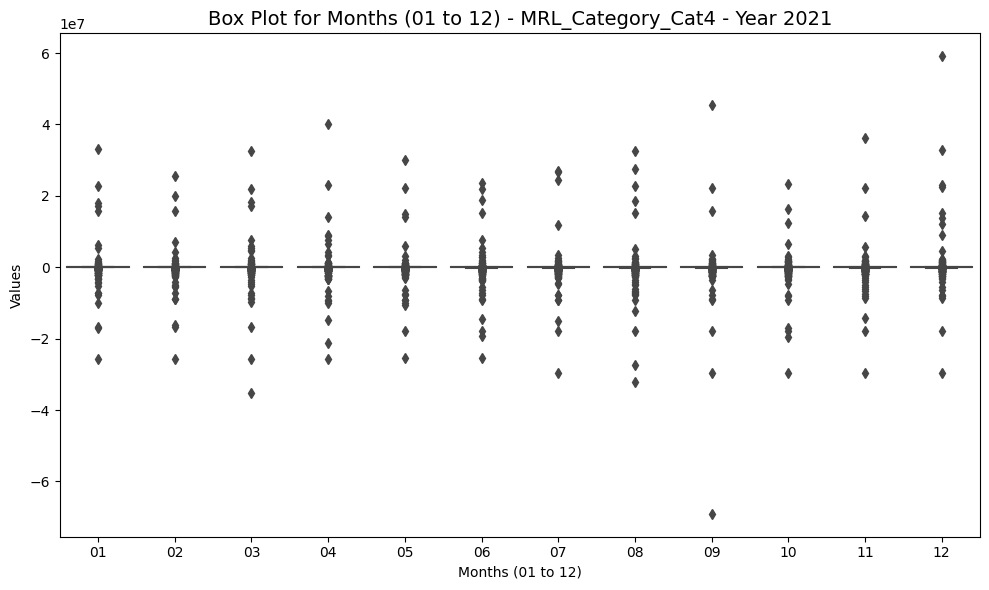

In [ ]:
# Month yearwise - and category wise
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming we have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4", "Year"]
selected_data = df_merged_group_cat[selected_columns]

# Function to create histograms and box plots
def create_plots(selected_data, year):
    year_data = selected_data[selected_data['Year'] == year]

    # Create histograms for the columns "01" to "12" for the current year
    plt.figure(figsize=(12, 8))
    year_data.iloc[:, :12].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.suptitle(f"Histograms for Months (01 to 12) - Year {year}", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Create separate box plots for each "MRL_Category_CatX" for the current year
    mrl_categories = ["MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4"]

    for category in mrl_categories:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="variable", y="value", data=pd.melt(year_data[year_data[category] == 1].iloc[:, :12]))
        plt.title(f"Box Plot for Months (01 to 12) - {category} - Year {year}", fontsize=14)
        plt.xlabel("Months (01 to 12)")
        plt.ylabel("Values")
        plt.tight_layout()
        plt.show()

# Step 2: Iterate over unique years in the DataFrame and create plots for each year
unique_years = selected_data['Year'].unique()

for year in unique_years:
    create_plots(selected_data, year)


<ipython-input-18-e377dd5b8a9a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MRL_Category_Cat1'] = selected_data['MRL_Category_Cat1'].astype('category')
<ipython-input-18-e377dd5b8a9a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Year'] = selected_data['Year'].astype(str)


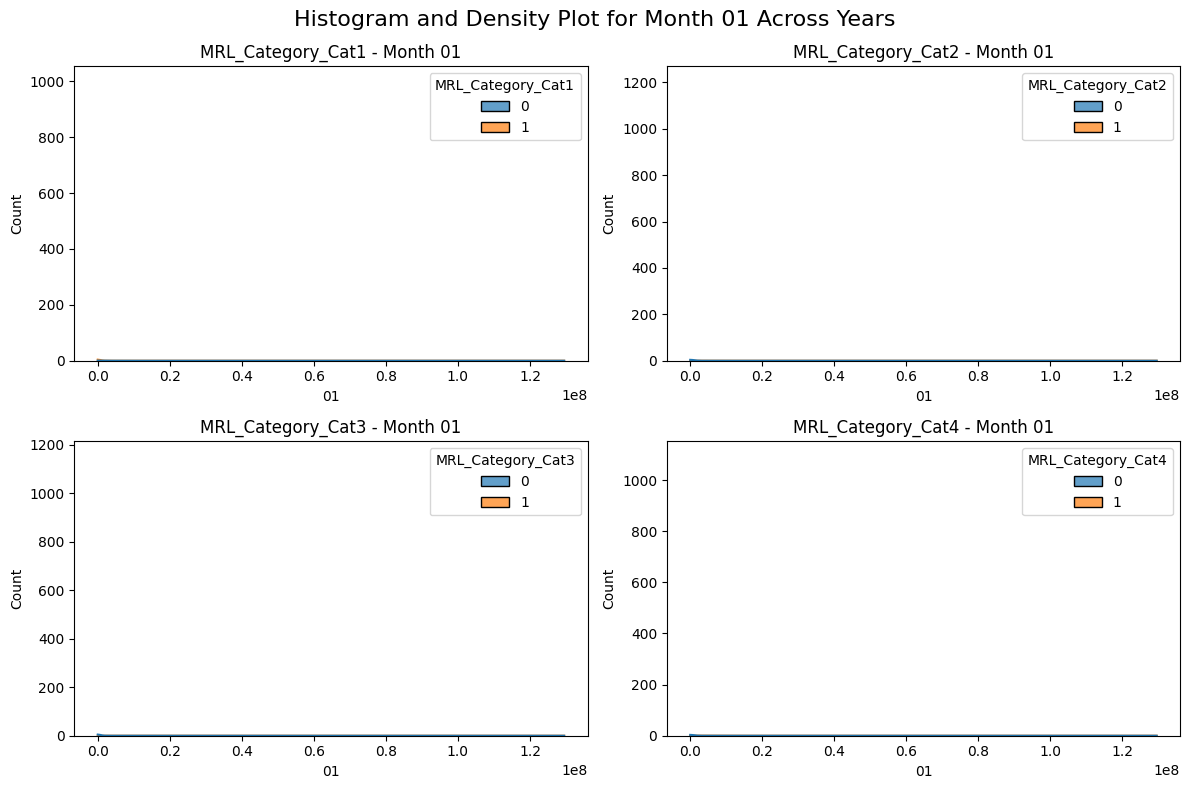

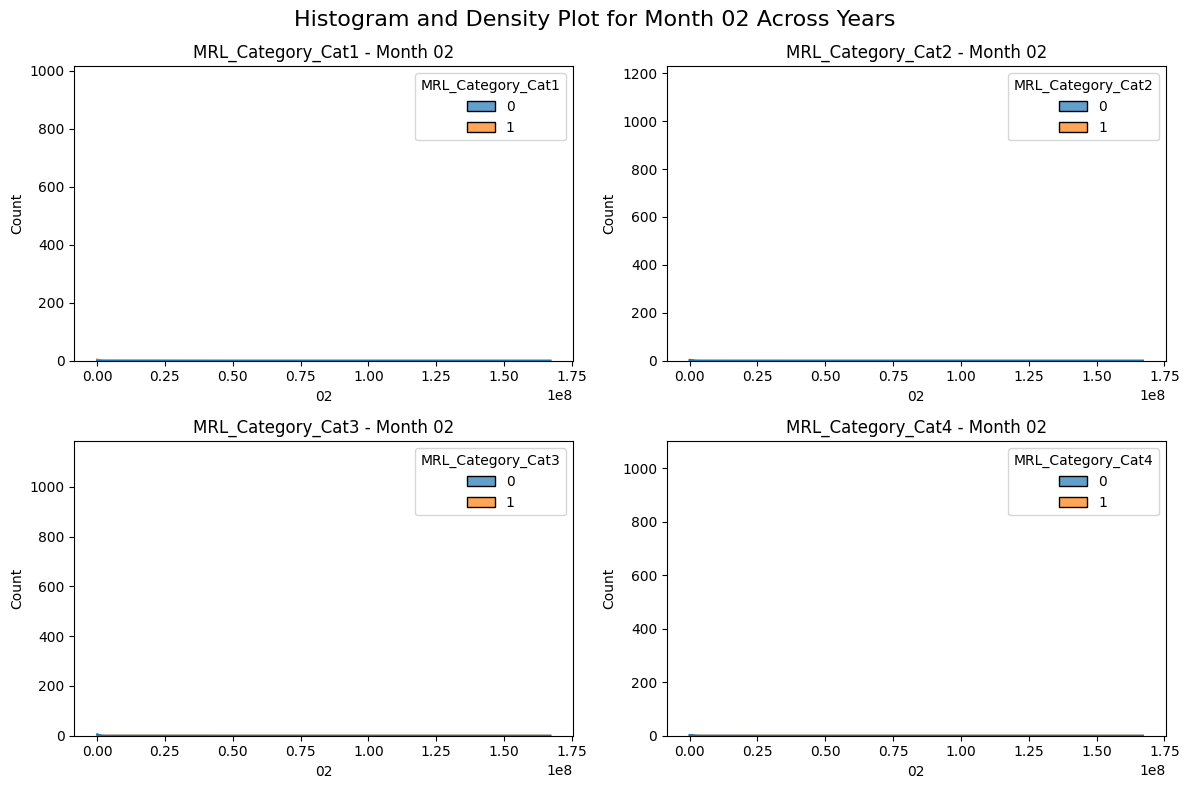

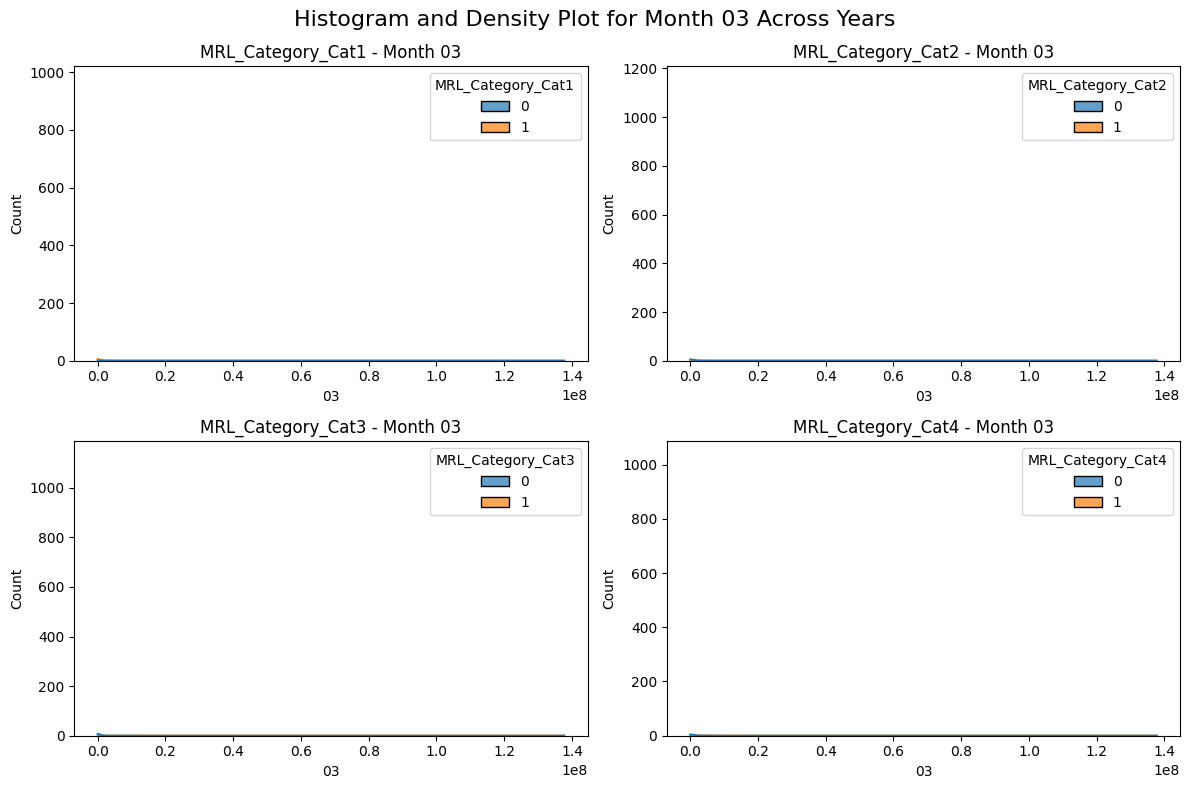

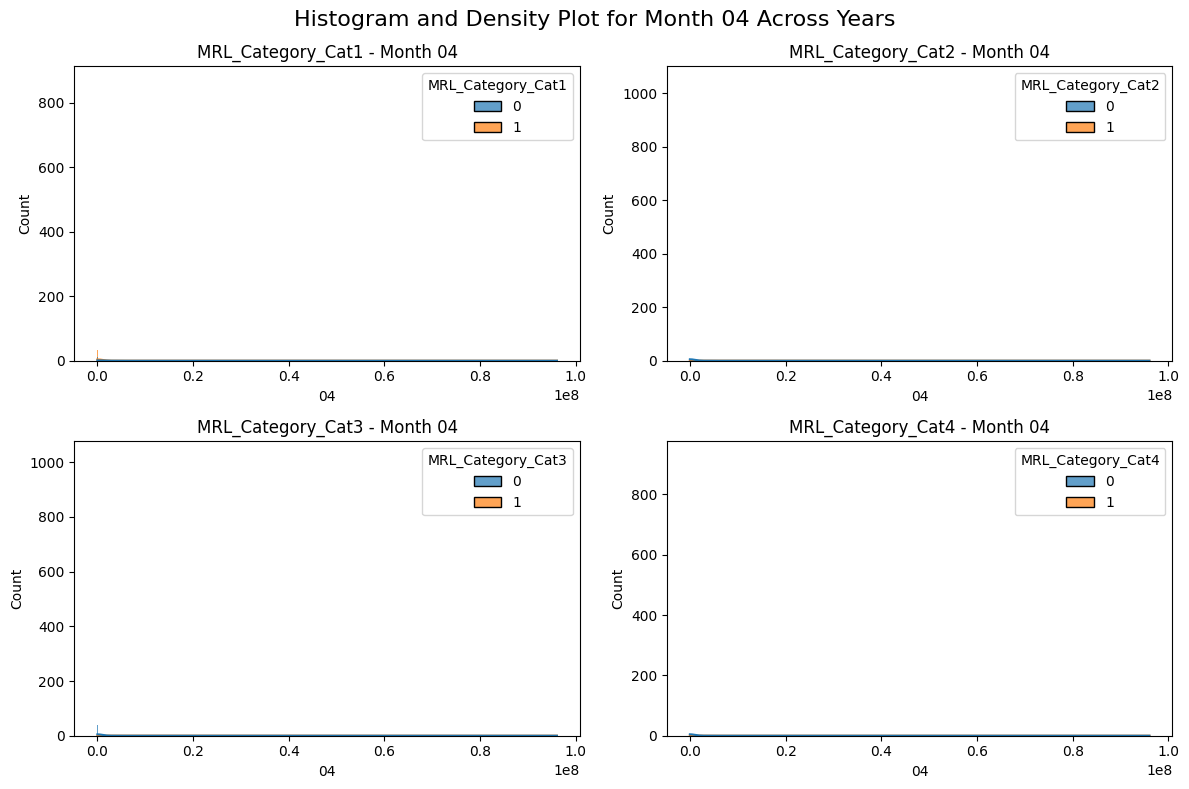

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7e5501ca6a70> (for post_execute):


KeyboardInterrupt: ignored

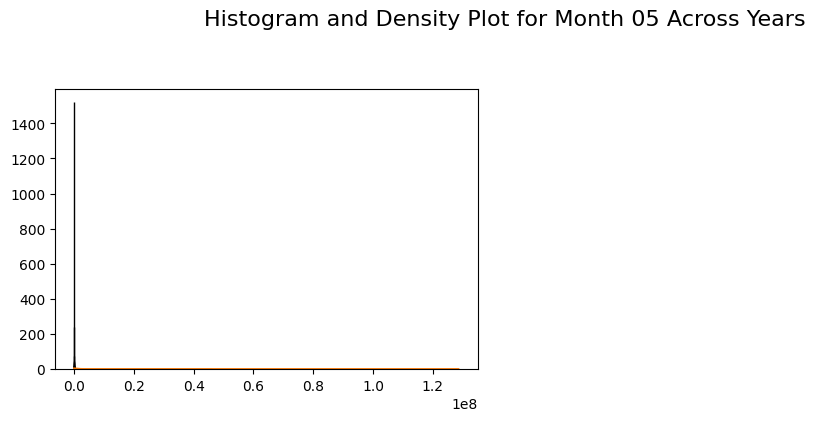

In [ ]:
### Combined plots ######################### DO not run this code on Normal Machine ###################################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming we have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4", "Year"]
selected_data = df_merged_group_cat[selected_columns]

# Convert 'MRL_Category_Cat1' to a categorical variable
selected_data['MRL_Category_Cat1'] = selected_data['MRL_Category_Cat1'].astype('category')

# Convert 'Year' to a string variable
selected_data['Year'] = selected_data['Year'].astype(str)

# Step 2: Iterate over unique months in the DataFrame and create plots for each month
unique_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

for month in unique_months:
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Histogram and Density Plot for Month {month} Across Categories", fontsize=16)
    for i, category in enumerate(["MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4"]):
        plt.subplot(2, 2, i + 1)  # Subplot positions (0, 1, 2, 3)
        sns.histplot(data=selected_data[selected_data[month] > 0], x=month, hue=category, kde=True, alpha=0.7)
        plt.title(f"{category} - Month {month}")
        plt.xlabel("Values")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Step 3: Create box plots for each "MRL_Category_CatX" for all months across years
plt.figure(figsize=(12, 8))
plt.suptitle("Box Plot for All Months - Categories Across Years", fontsize=16)
for i, category in enumerate(["MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4"]):
    plt.subplot(2, 2, i + 1)  # Subplot positions (0, 1, 2, 3)
    sns.boxplot(x="Year", y=month, hue=category, data=selected_data, hue_order=[1, 2, 3, 4])
    plt.title(f"{category} - All Months")
    plt.xlabel("Year")
    plt.ylabel("Values")

plt.tight_layout()
plt.show()











In [ ]:
######################  Do not run this code if you normal machine #########################################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataset in a DataFrame named 'df_merged_group_cat'

# Step 1: Select the relevant columns for analysis
selected_columns = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "MRL_Category_Cat1", "MRL_Category_Cat2", "MRL_Category_Cat3", "MRL_Category_Cat4", "Year"]
selected_data = df_merged_group_cat[selected_columns]

print("Started..............................")

# Step 2: Group data by 'Year'
grouped_data = selected_data.groupby('Year')

# Step 3: Create histograms and box plots
unique_months = selected_data.loc[:, "10":"21"].columns

print("entering to plot .............")
# Histograms
plt.figure(figsize=(16, 10))
for i, month in enumerate(unique_months, 1):
    plt.subplot(3, 4, i)
    for year, group_df in grouped_data:
        month_data = group_df[month]
        sns.histplot(month_data, kde=True, label=f'Year {year}', alpha=0.7)

    plt.xlabel(f"Month {month}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram Comparison for Month {month} across Years")
    plt.legend()

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(16, 10))
for i, month in enumerate(unique_months, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x="Year", y=month, data=selected_data)
    plt.title(f"Box Plot for Month {month} across Years")
    plt.xlabel("Year")
    plt.ylabel(f"Month {month}")

plt.tight_layout()
plt.show()


Started..............................
entering to plot .............
